In [1]:
import time 
import requests 
import numpy as np 
import pandas as pd 
import mplfinance as mpf 
import matplotlib.pyplot as plt 
from talib import abstract 
from datetime import datetime


In [2]:
#DataFrame Setting
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth',100)
pd.set_option('display.width', 5000)
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)


In [3]:
#Global Variables Setting
symbol = 'BTCUSDT'
url = 'https://api.binance.com/'


In [4]:
def GetKline(url, symbol, interval, startTime = None, endTime = None):
    try:
        data = requests.get(url + 'api/v3/klines', params={'symbol': symbol, 'interval': interval, 'startTime': startTime, 'limit': 1000}).json()
    except Exception as e:
            print ('Error! problem is {}'.format(e.args[0]))
    tmp  = []
    pair = []
    for base in data:
            tmp  = []
            for i in range(0,6):
                if i == 0:
                    base[i] = datetime.fromtimestamp(base[i]/1000)
                tmp.append(base[i])
            pair.append(tmp)
    df = pd.DataFrame(pair, columns=['date', 'open', 'high', 'low', 'close', 'volume'])
    df.date = pd.to_datetime(df.date)
    df.set_index("date", inplace=True)
    df = df.astype(float)
    return df
def GetHistoricalKline(url, symbol, interval, startTime):
    # init
    klines = GetKline(url, symbol, interval)
    tmptime = ToMs(klines.iloc[0].name)
    
    # Send request until tmptime > startTime
    while tmptime > startTime:
        tmptime -= PeriodToMs(interval) * 1000 # tmp minus period ms plus 1000 (1000 K)
        if tmptime < startTime:
            tmptime = startTime
        tmpdata = GetKline(url, symbol, interval, tmptime)
        klines  = pd.concat([tmpdata, klines])
    return klines.drop_duplicates(keep='first', inplace=False)


In [5]:
# Math Tools
def ToMs(date):
    return int(time.mktime(time.strptime(str(date), "%Y-%m-%d %H:%M:%S")) * 1000) # Binance timestamp format is 13 digits
def PeriodToMs(period):
    Ms = None
    ToSeconds = {
        "m": 60,
        "h": 60 * 60,
        "d": 24 * 60 * 60,
        "w": 7 * 24 * 60 * 60
    }
    unit = period[-1]

    if unit in ToSeconds:
        try:
            Ms = int(period[:-1]) * ToSeconds[unit] * 1000
        except ValueError:
            pass
    return Ms


In [8]:
#爬取4H K資料
if __name__ == "__main__":
    klines = GetHistoricalKline(url, symbol, '1h', ToMs('2020-01-01 12:00:00'))
    print (klines)


                         open      high       low     close        volume
date                                                                     
2020-01-01 12:00:00   7225.00   7230.00   7215.03   7217.27    467.812578
2020-01-01 13:00:00   7217.26   7229.76   7216.65   7224.21    344.670596
2020-01-01 14:00:00   7224.24   7236.27   7221.51   7225.62    621.467023
2020-01-01 15:00:00   7225.88   7232.94   7199.11   7209.83    627.344854
2020-01-01 16:00:00   7209.83   7210.00   7180.00   7200.64    915.545974
2020-01-01 17:00:00   7200.29   7210.51   7188.00   7188.77    636.386102
2020-01-01 18:00:00   7189.07   7210.00   7185.20   7202.00    537.762804
2020-01-01 19:00:00   7202.01   7237.73   7188.61   7197.20   1076.959481
2020-01-01 20:00:00   7197.20   7233.33   7196.15   7225.59    868.753580
2020-01-01 21:00:00   7225.84   7231.89   7212.88   7221.20    612.180902
2020-01-01 22:00:00   7221.17   7234.97   7208.17   7221.43    617.714185
2020-01-01 23:00:00   7221.60   7255.0

C:\Users\wslin\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


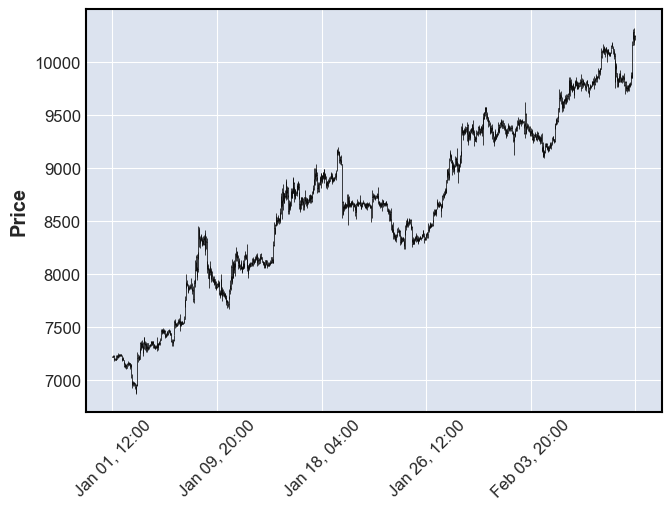

In [10]:
#繪製圖表
if __name__ == "__main__":
    klines = GetKline(url, symbol, '1h',  ToMs('2020-01-01 12:00:00'))
    mpf.plot(klines)


C:\Users\wslin\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


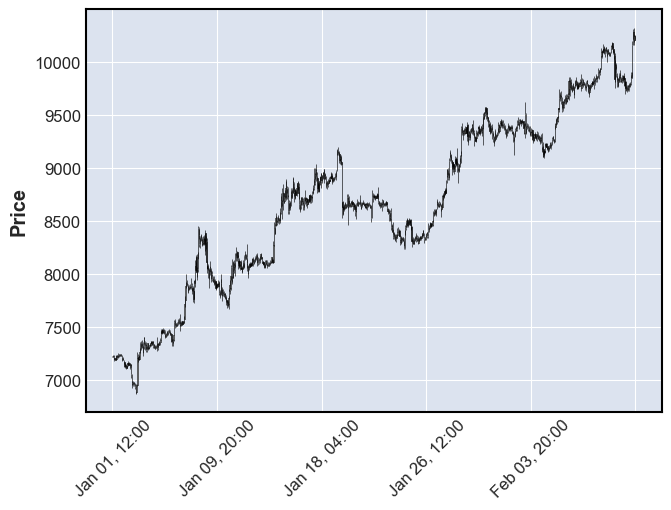

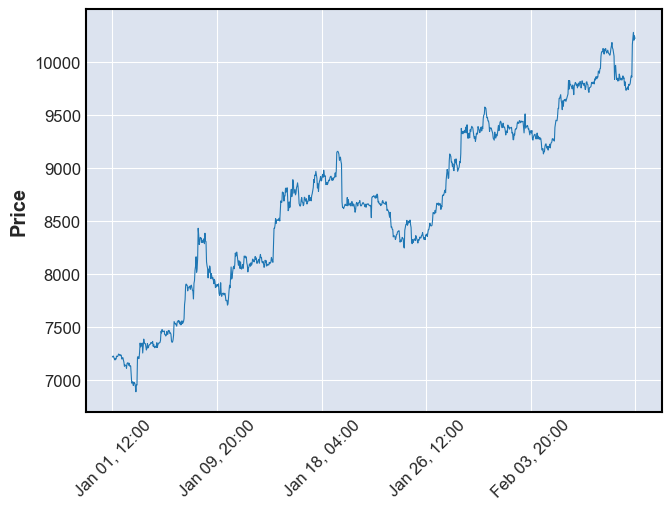

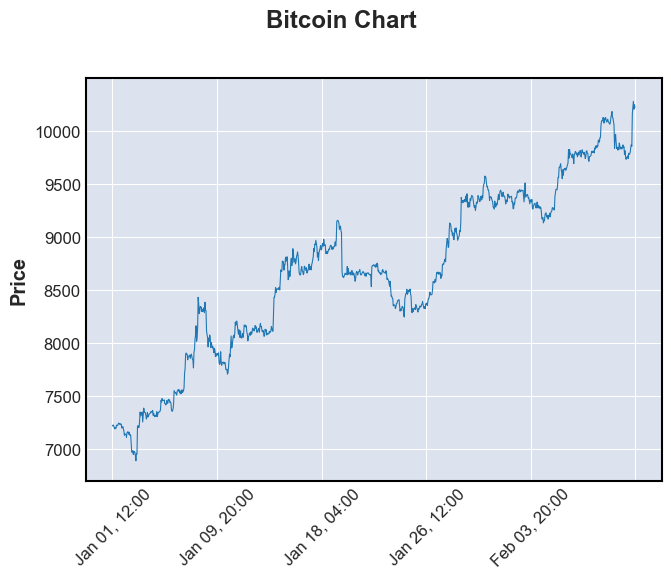

C:\Users\wslin\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


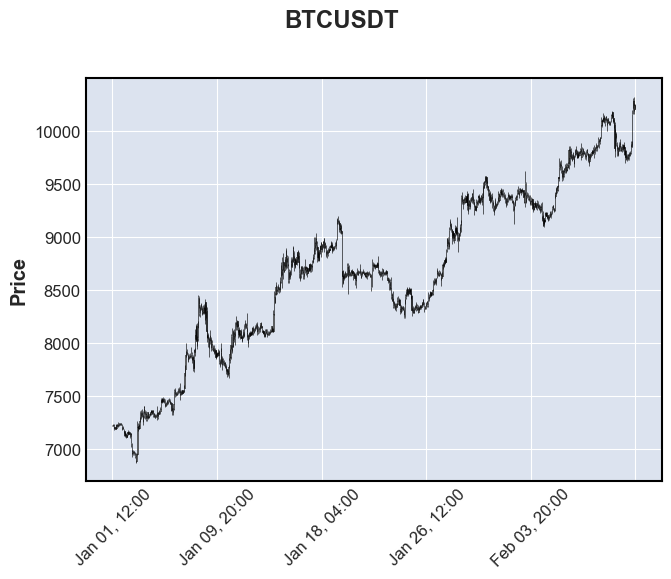

In [11]:
# 蠟燭圖
mpf.plot(klines, type = 'candle') 

# 線圖
mpf.plot(klines, type = 'line') 

#利用 title 參數為圖表加上標題：
mpf.plot(klines, type = 'line', title = 'Bitcoin Chart')

# 用前面的全域變數命名
mpf.plot(klines, type = 'candle', title = symbol) 


C:\Users\wslin\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


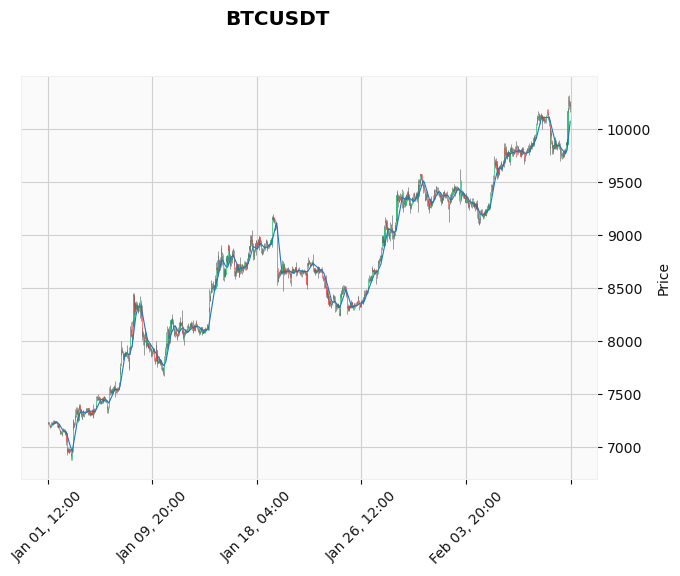

In [12]:
# 單MA直接宣告即可
mpf.plot(klines, type = 'candle', title = symbol, mav = 10,style="yahoo")


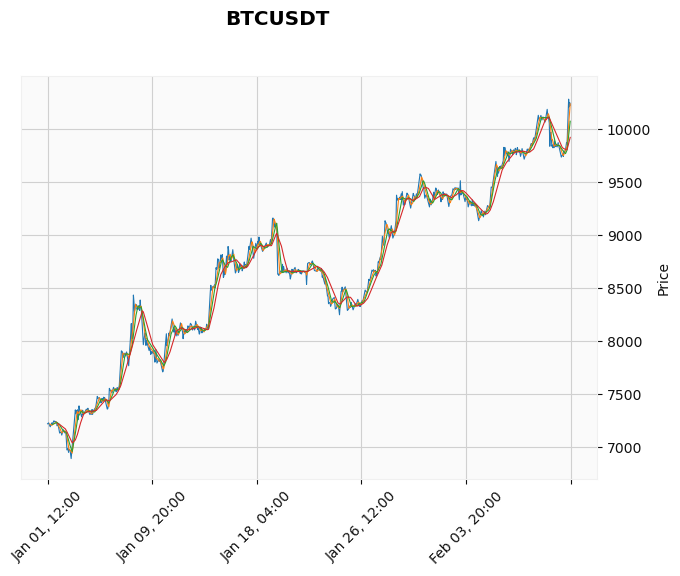

In [13]:
# 多組均線可以利用元組達成
mpf.plot(klines, type = 'line', title = symbol, mav = (5, 10, 20),style="yahoo")


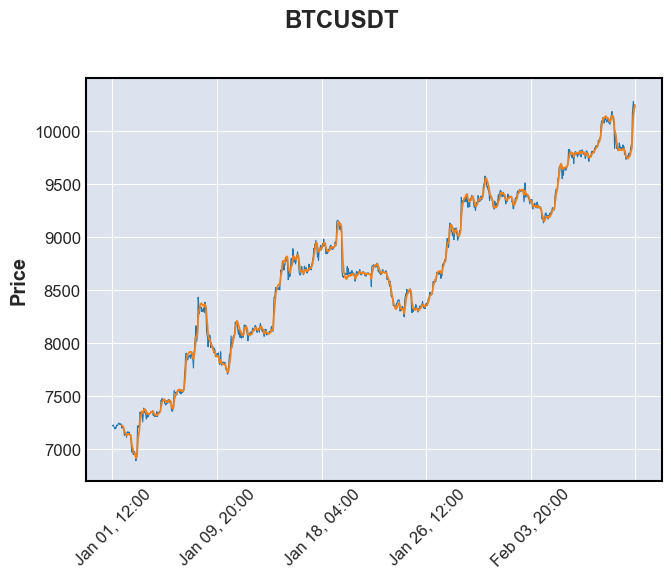

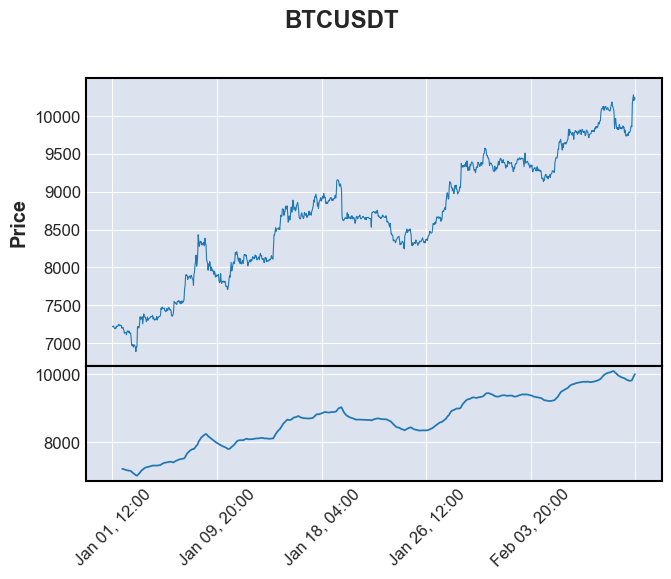

In [14]:
from talib import abstract

#增加技術指標，以函數方式撰寫，可以變成一個指標模組命名為TA_model.py
#先import這個模型，使用某個技術指標時呼叫即可
# # Financial indicators
def DEMA(df, period):
    
    return abstract.DEMA(df, timeperiod=period)
def EMA(df, period):
    return abstract.EMA(df, timeperiod=period)
def SMA(df, period):
    return abstract.SMA(df, timeperiod=period)

def RSI(df, period):
    return abstract.RSI(df, timeperiod=period)

#DEMA繪製
index  = mpf.make_addplot(DEMA(klines, 10))
mpf.plot(klines, type = 'line', title = symbol, addplot = [index])

#EMA繪製 ( 可以透過 panel 指定繪製區域 )
index  = mpf.make_addplot(EMA(klines, 20), panel = 1)
mpf.plot(klines, type = 'line', title = symbol, addplot = [index])

